In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
url = 'https://raw.githubusercontent.com/BrianBehnke/Week5-NFL-Salary-Project/master/NFLdataExtract2.csv'
nfl_data=pd.read_csv(url)
nfl_data.head()

,Number of Records,Passing TDs,Player,Position,Pts,Salary,Team,Points
0,1,0,A.J. Derby,TE,12,705000,2TM,12
1,1,0,A.J. Green,WR,48,10550000,CIN,48
2,1,0,Aaron Jones,RB,24,489706,GNB,24
3,1,0,Adam Humphries,WR,6,2914000,TAM,6
4,1,0,Adam Shaheen,TE,18,733661,CHI,18


In [3]:
nfl_data.shape

(408, 8)

In [55]:
nfl_data['Salary'].mean()

2411661.6985294116

In [60]:
pd.set_option('display.float_format', '{:,.2f}'.format)


In [63]:
nfl_data.groupby(['Position'])['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
DB,45.00,"2,724,347.47","3,004,217.20","555,000.00","656,000.00","1,332,331.00","2,914,000.00","11,287,000.00"
DL,19.00,"4,633,440.63","5,000,641.40","555,000.00","962,892.50","1,500,000.00","8,825,000.00","15,000,000.00"
K,33.00,"1,368,657.21","874,110.05","359,117.00","630,000.00","1,015,000.00","2,000,000.00","3,200,000.00"
LB,21.00,"3,335,633.14","3,941,658.38","457,059.00","790,000.00","1,138,080.00","3,638,216.00","14,750,000.00"
QB,26.00,"5,537,259.54","6,117,954.88","418,235.00","712,519.00","2,042,264.00","9,875,000.00","22,500,000.00"
RB,86.00,"1,317,556.43","1,200,205.54","129,200.00","630,000.00","795,814.00","1,530,000.00","6,350,000.00"
T,1.00,"630,000.00",nan,"630,000.00","630,000.00","630,000.00","630,000.00","630,000.00"
TE,61.00,"1,856,856.13","1,929,724.39","259,413.00","705,000.00","1,000,000.00","1,897,000.00","8,250,000.00"
WR,116.00,"2,473,587.55","2,964,678.40","121,600.00","630,000.00","982,708.00","2,966,941.50","12,500,000.00"


In [64]:
nfl_data.groupby(['Position'])['Points'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
DB,45.00,7.07,4.23,2.00,6.00,6.00,6.00,30.00
DL,19.00,6.11,1.70,2.00,6.00,6.00,6.00,12.00
K,33.00,94.97,44.05,1.00,71.00,99.00,136.00,158.00
LB,21.00,6.00,1.90,2.00,6.00,6.00,6.00,12.00
QB,26.00,113.15,58.59,6.00,66.00,120.00,159.00,222.00
RB,86.00,25.53,21.23,2.00,7.50,18.00,36.00,114.00
T,1.00,6.00,nan,6.00,6.00,6.00,6.00,6.00
TE,61.00,16.98,14.19,2.00,6.00,12.00,24.00,62.00
WR,116.00,22.17,16.01,6.00,11.00,18.00,30.00,78.00


In [4]:
nfl_data.describe()

,Number of Records,Passing TDs,Pts,Salary,Points
count,408.0,408.000000,408.000000,4.080000e+02,408.000000
mean,1.0,1.041667,24.254902,2.411662e+06,30.504902
std,0.0,4.625082,29.065016,3.137377e+06,38.841390
min,1.0,0.000000,1.000000,1.216000e+05,1.000000
25%,1.0,0.000000,6.000000,6.375000e+05,6.000000
50%,1.0,0.000000,12.000000,1.000000e+06,12.000000
75%,1.0,0.000000,30.000000,2.517500e+06,36.000000
max,1.0,34.000000,158.000000,2.250000e+07,222.000000


In [5]:
nfl_data.sample(10)

,Number of Records,Passing TDs,Player,Position,Pts,Salary,Team,Points
370,1,0,Terrelle Pryor,QB,6,418235,WAS,6
12,1,0,Aldrick Rosas,K,74,555000,NYG,74
268,1,0,Leonard Fournette,RB,60,1699129,JAX,60
216,1,0,Johnathan Joseph,DB,6,2400000,HOU,6
67,1,0,Calais Campbell,DL,6,15000000,JAX,6
49,1,0,Brandon LaFell,WR,18,915000,CIN,18
356,1,0,Stefon Diggs,WR,48,1907000,MIN,48
8,1,0,Adrian Clayborn,DL,6,1500000,ATL,6
308,1,0,Myles Jack,LB,6,1025858,JAX,6
362,1,0,T.J. Yeldon,RB,12,1241421,JAX,12


In [34]:
nfl_scorers = nfl_data.loc[nfl_data['Points'] >= 40]


In [35]:
nfl_scorers = nfl_scorers.loc[nfl_scorers['Salary'] >= 1000000]
nfl_scorers.head().T

,1,6,16,20,21
Number of Records,1,1,1,1,1
Passing TDs,0,0,26,0,0
Player,A.J. Green,Adam Vinatieri,Alex Smith,Alshon Jeffery,Alvin Kamara
Position,WR,K,QB,WR,RB
Pts,48,109,6,60,86
Salary,10550000,2625000,13000000,1000000,6350000
Team,CIN,IND,KAN,PHI,NOR
Points,48,109,162,60,86


In [36]:
nfl_scorers.describe()

,Number of Records,Passing TDs,Pts,Salary,Points
count,64.0,64.000000,64.000000,6.400000e+01,64.000000
mean,1.0,5.109375,60.421875,4.600796e+06,91.078125
std,0.0,9.814335,40.912917,4.409609e+06,47.365953
min,1.0,0.000000,2.000000,1.000000e+06,42.000000
25%,1.0,0.000000,42.000000,1.649347e+06,48.000000
50%,1.0,0.000000,48.000000,2.562500e+06,72.000000
75%,1.0,0.000000,78.000000,6.462500e+06,131.500000
max,1.0,34.000000,158.000000,2.250000e+07,222.000000


In [9]:
nfl_scorers.head()

,Number of Records,Passing TDs,Player,Position,Pts,Salary,Team,Points
1,1,0,A.J. Green,WR,48,10550000,CIN,48
3,1,0,Adam Humphries,WR,6,2914000,TAM,6
5,1,0,Adam Thielen,WR,24,3850000,MIN,24
6,1,0,Adam Vinatieri,K,109,2625000,IND,109
7,1,0,Adrian Amos,DB,6,1907000,CHI,6


In [37]:
nfl_scorers = nfl_scorers.drop('Number of Records', axis=1)
nfl_scorers = nfl_scorers.drop('Passing TDs', axis=1)
nfl_scorers = nfl_scorers.drop('Pts', axis=1)

In [38]:
nfl_scorers.head()

,Player,Position,Salary,Team,Points
1,A.J. Green,WR,10550000,CIN,48
6,Adam Vinatieri,K,2625000,IND,109
16,Alex Smith,QB,13000000,KAN,162
20,Alshon Jeffery,WR,1000000,PHI,60
21,Alvin Kamara,RB,6350000,NOR,86


In [39]:
nfl_scorers.describe()

,Salary,Points
count,6.400000e+01,64.000000
mean,4.600796e+06,91.078125
std,4.409609e+06,47.365953
min,1.000000e+06,42.000000
25%,1.649347e+06,48.000000
50%,2.562500e+06,72.000000
75%,6.462500e+06,131.500000
max,2.250000e+07,222.000000


In [40]:
nfl_scorers['Salary'].mean()

4600796.1875

In [41]:
nfl_scorers['Points'].mean()

91.078125

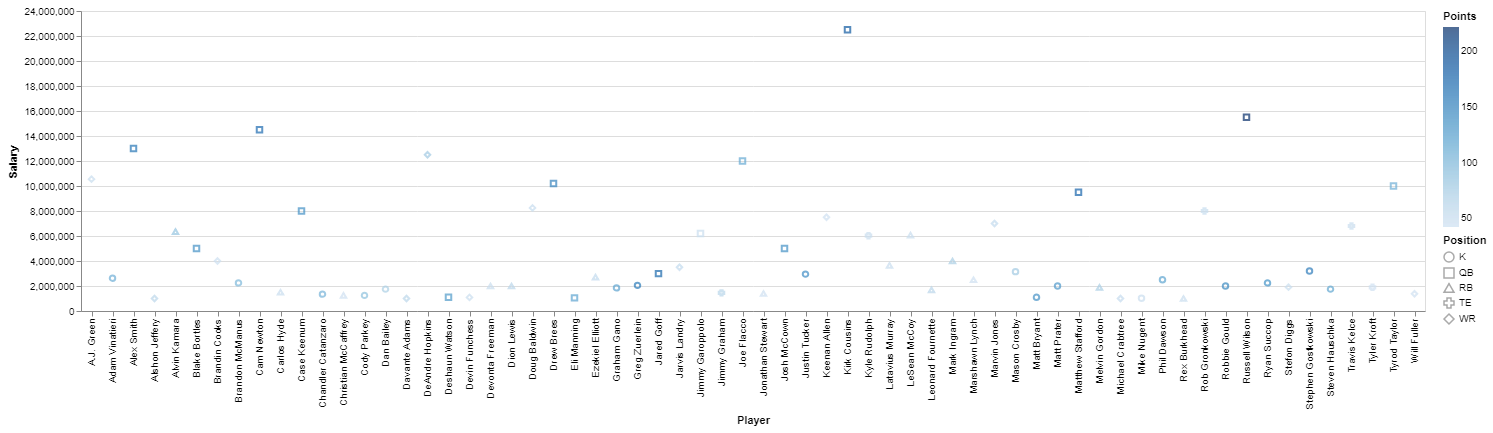

In [42]:
alt.Chart(nfl_scorers).mark_point().encode(
    x='Player',
    y='Salary',
    color='Points',
    shape='Position'
)

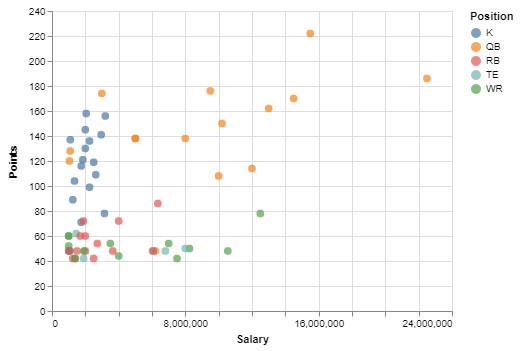

In [43]:
alt.Chart(nfl_scorers).mark_circle(size=60).encode(
    x='Salary',
    y='Points',
    color='Position',
    tooltip=['Player', 'Salary', 'Points', 'Position']
).interactive()

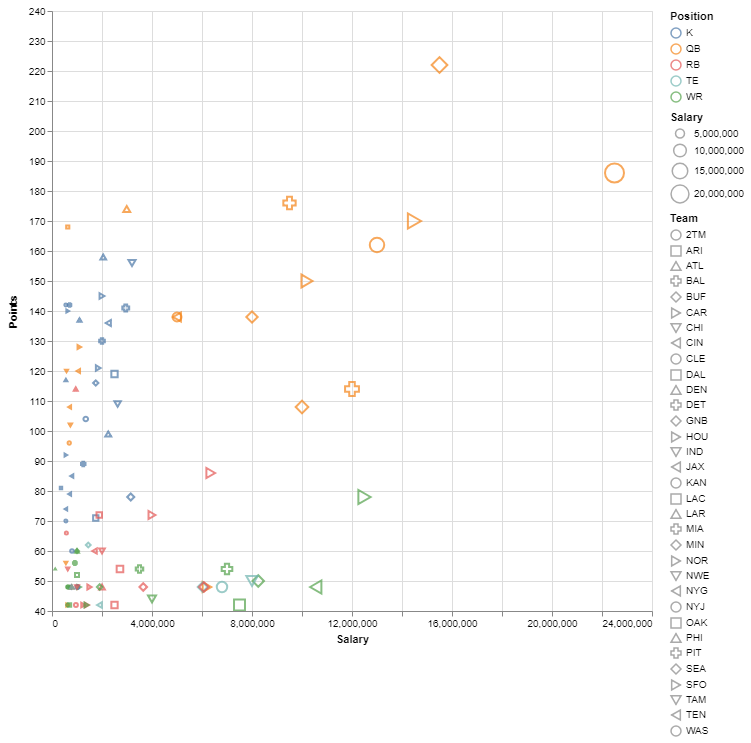

In [28]:
alt.Chart(nfl_scorers).mark_point().encode(
    alt.X('Salary', scale=alt.Scale(zero=False)),
    alt.Y('Points', scale=alt.Scale(zero=False, padding=1)),
    color='Position',
    size='Salary',
    shape='Team',
    tooltip=['Player', 'Team', 'Salary', 'Points', 'Position']
).configure_view(height=600, width=600).interactive()

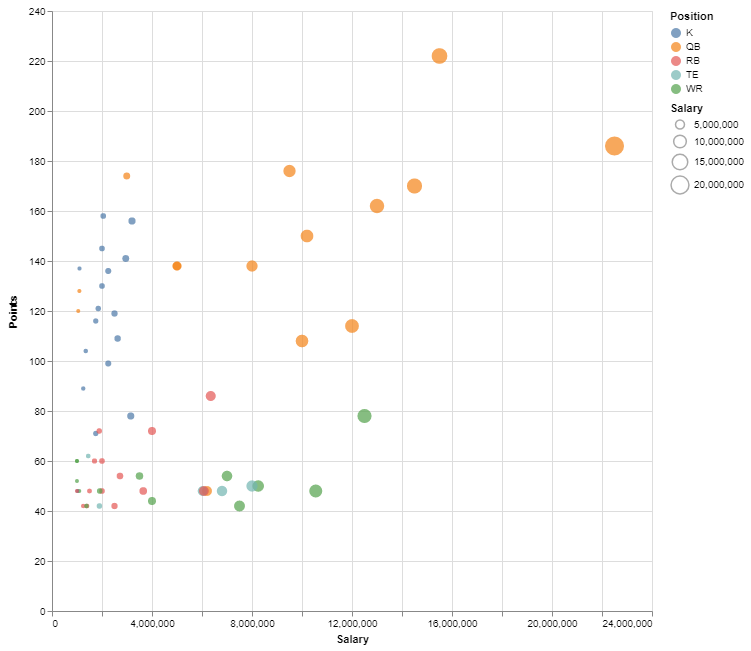

In [44]:
alt.Chart(nfl_scorers).mark_circle().encode(
    alt.X('Salary', scale=alt.Scale(zero=True)),
    alt.Y('Points', scale=alt.Scale(zero=True, padding=1)),
    color='Position',
    size='Salary',
    tooltip=['Player', 'Salary', 'Points', 'Position']
).interactive().configure_view(height=600, width=600)

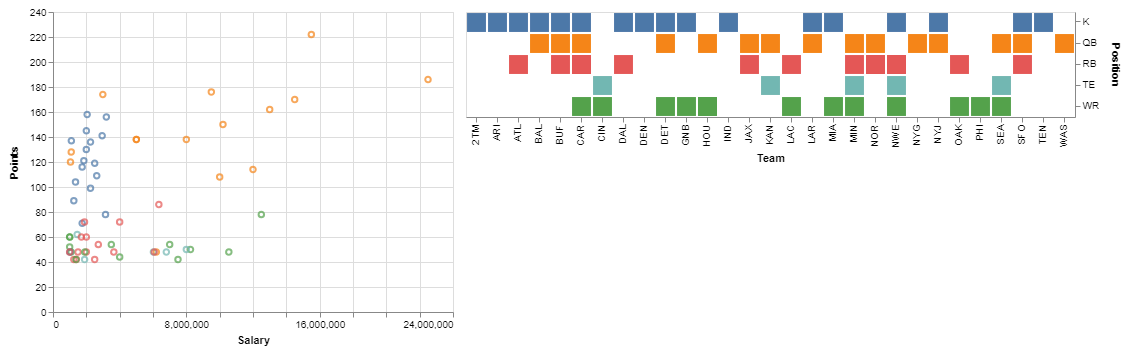

In [45]:
selection = alt.selection_multi(fields=['Position', 'Team'])
color = alt.condition(selection,
                      alt.Color('Position:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(nfl_scorers).mark_point().encode(
    x='Salary:Q',
    y='Points:Q',
    color=color,
    tooltip='Player'
)

legend = alt.Chart(nfl_scorers).mark_rect().encode(
    y=alt.Y('Position:N', axis=alt.Axis(orient='right')),
    x='Team',
    color=color
).add_selection(
    selection
)

scatter | legend

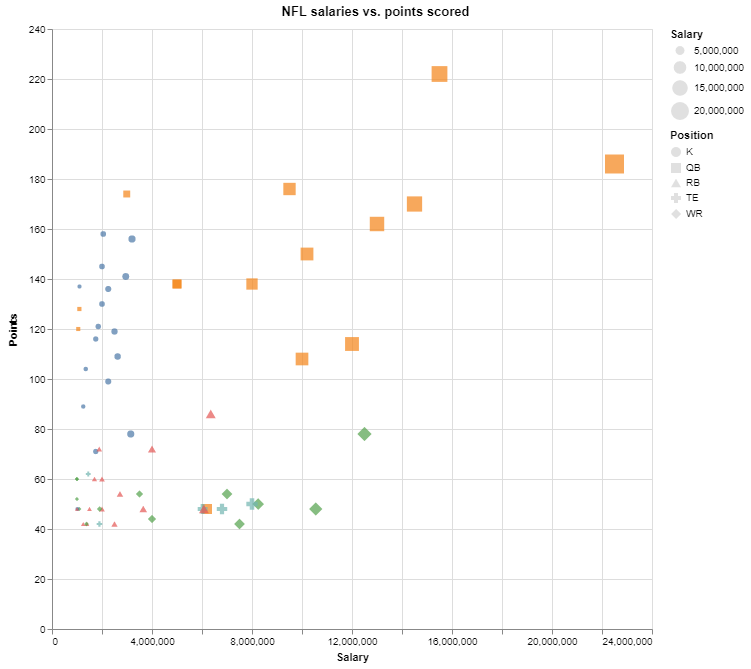

In [46]:
input_dropdown = alt.binding_select(options=['QB','RB','WR', 'K', 'DB', 'DL', 'TE', 'LB'])
selection = alt.selection_single(fields=['Position'], bind=input_dropdown, name='Player ')
color = alt.condition(selection,
                    alt.Color('Position:N', legend=None),
                    alt.value('lightgray'))

myChart = alt.Chart(nfl_scorers).mark_point(filled=True).encode(
    x='Salary:Q',
    y='Points:Q',
    color=color,
    tooltip=('Player', 'Salary', 'Team', 'Position'),
    size='Salary',
    shape='Position'
).add_selection(
    selection
).configure_view(height=600, width=600).properties(title="NFL salaries vs. points scored")
myChart
#myChart.save(fp='chart.json')
#myChart.save('chart.html')

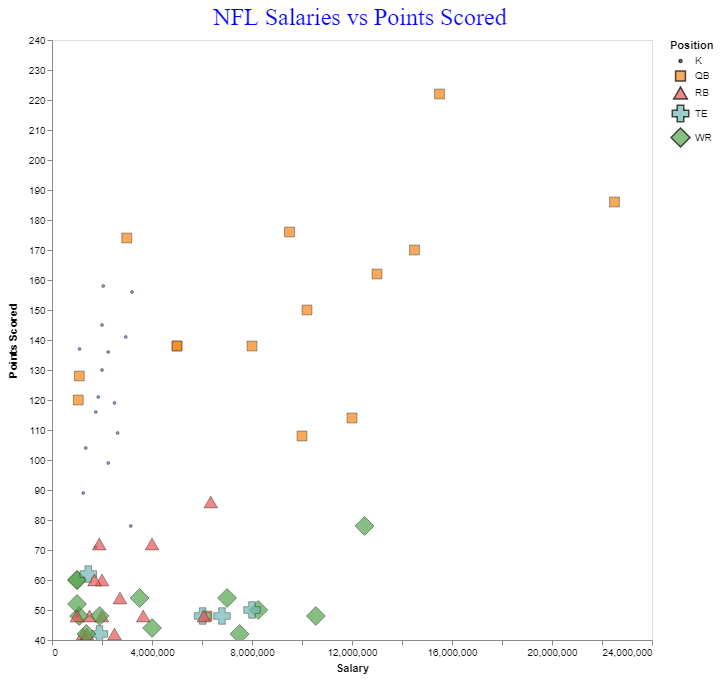

In [47]:
input_dropdown = alt.binding_select(options=['QB','RB','WR', 'K', 'TE'])
selection = alt.selection_single(fields=['Position'], bind=input_dropdown, name='Player')
color = alt.condition(selection,
                    alt.Color('Position:N', scale=alt.Scale(scheme='tableau10')),
                    alt.value('lightgray'))
sizes = alt.Size('Position',scale=alt.Scale(zero=False))
title_str = "NFL Salaries vs Points Scored"

myChart2 = alt.Chart(nfl_scorers).mark_point(filled=True, stroke="black", strokeWidth=.5

).encode(
    alt.X('Salary:Q',scale=alt.Scale(zero=False), 
          axis=alt.Axis(title='Salary', grid=False)),
    alt.Y('Points:Q',scale=alt.Scale(zero=False),axis=alt.Axis(title='Points Scored', grid=False)),

    color=color,
    tooltip=('Player', 'Salary', 'Team', 'Position', 'Points'),
    size=sizes,
   
    shape='Position'

).add_selection(selection
                                
).properties(title=alt.TitleParams(text=title_str), height=600, width=600, background='white'
             
).configure(
    title = alt.VgTitleConfig(
        font = 'Times New Roman',
        fontSize=24,
        fontWeight = 500,
        color="blue")                                                                                                        

).interactive()

myChart2
#myChart2.save(fp='chart.json')
#myChart2.save('chart.html')